In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [53]:
def ccf(ml_utility, max_utility):
    """
    Collaborative Characteristic Function (human+ml utility as a function of ml utility)
    """
    if ml_utility<=0:
        return None
    else:
        return min(max_utlity, ml_utility*1.5)

def get_error(data_size, c=1.0):
    """
    calculates the error as function of the data size. uses hoeffdings bound
    """
    if data_size<=0:
        return None
    else:
        return c/math.sqrt(data_size)

def get_angle(error, EPS=0.0000005):
    """
    Function that converts an approximate error rate 
    on the current distribution to the angle in the latent utility space
    """
    angle = 0
    if error >1:
        return 0
    if error <0:
        return 90
    
    if error <= EPS: #perfect learning
        angle = 90
    elif error >=1: # usually we can assume that 1/sqrt(n) <= 1 
        angle = 0
    else:
        angle = (1-error)*90
        
    return angle

def calculate_intersection(alpha, current_utility):
    """
    calculates the level of utility if we would deploy with the current learning angle
    """
    alpha_rad = np.radians(alpha)

    #slope of the learning trajectory
    if alpha == 90:
        m = 0 
    else:
        m = -1 / np.tan(alpha_rad)

    #y = m * x + current_utility
    #diagonal: y = x
    #set equal: m * x + current_utility = x
    #=> (m - 1) * x = -current_utility
    if m != 1:
        x_intersection = -current_utility / (m - 1)
        y_intersection = x_intersection  #y = x
        return x_intersection, y_intersection
    else:
        return None  #no intersection

max_utlity = 1.0

In [76]:
class ContinuousEnvironment:
    def __init__(self, params):
        self.current_utility = params["start_utility"]
        self.next_utility = self.current_utility
        self.time_preference = params["time_preference"]
        self.current_datasize = 0
        self.data_collection_size = params["data_collection_size"]
        self.accumulated_utility = []
        self.current_error = 1
        self.max_utility = params["max_utility"]
        self.points = []
        self.next_ml_utility = 0
        self.next_intersections = 0
        self.intersections = []
        self.next_angle = 0
        self.angles = []
        
    def collect_data(self):
        self.current_datasize = self.current_datasize+self.data_collection_size
        return self.current_datasize

    def step(self, action):
        """
        collect data to improve the next model's performance or deploy with the current learning trajectory 
        """
        if action == "collect":
            self.accumulated_utility.append(self.current_utility)
            self.current_datasize = self.collect_data()
            self.current_error = get_error(self.current_datasize)
            learning_trajectory = get_angle(self.current_error)
            self.next_angle = learning_trajectory
            self.next_ml_utility,_ = calculate_intersection(learning_trajectory,self.current_utility)
            self.next_utility = ccf(self.next_ml_utility,self.max_utility)
            self.intersection = self.next_ml_utility
        elif action == "deploy":
            self.accumulated_utility.append(self.current_utility)
            self.current_datasize = 0
            self.current_utility = self.next_utility
            self.current_error = 1
            self.points.append((self.next_ml_utility, self.current_utility))
            self.intersections.append(self.next_ml_utility)
            self.angles.append(self.next_angle)
        else:
            print(f"Action ´´{action}´´ not found")
        print(f"Current Utility {self.current_utility}")
        print(f"Next Utility {self.next_utility}")

    def render(self):
        #diagonal f(x) = x
        fig, ax = plt.subplots()

        x_vals = np.linspace(0, 1, 100)
        y_vals = x_vals
        
        x,y = zip(*self.points)
        
        ax.plot(x_vals, y_vals, label="Diagonal f(x) = x", linestyle="--")
        ax.scatter(x,y, color='red')
        ax.scatter(self.intersections, self.intersections, color='green')
        ax.plot(x,y, color='red', linestyle="--")
        
        ys = [item for pair in zip(self.intersections,y) for item in pair]
        xs = [item for item in x for _ in range(2)]
        ax.plot(xs,ys, color='blue')
        plt.grid()
        plt.show()

In [77]:
params = {
    "max_utility": max_utlity,
    "start_utility": 0.1,
    "data_collection_size": 1000,
    "time_preference":0.1
}
env = ContinuousEnvironment(params)

In [78]:
for i in range(10):
    for j in range(10):
        env.step("collect")
    env.step("deploy")
#Current Utility 0.0010889581881046244
#Next Utility 0.0010889581881046244


Current Utility 0.1
Next Utility 0.1428960873420318
Current Utility 0.1
Next Utility 0.14490814164457894
Current Utility 0.1
Next Utility 0.14581701281644838
Current Utility 0.1
Next Utility 0.14636408505930015
Current Utility 0.1
Next Utility 0.1467397265516381
Current Utility 0.1
Next Utility 0.14701822435680345
Current Utility 0.1
Next Utility 0.14723538859264793
Current Utility 0.1
Next Utility 0.1474108981903572
Current Utility 0.1
Next Utility 0.14755658681093112
Current Utility 0.1
Next Utility 0.14768005628953448
Current Utility 0.14768005628953448
Next Utility 0.14768005628953448
Current Utility 0.14768005628953448
Next Utility 0.21102902222225492
Current Utility 0.14768005628953448
Next Utility 0.2140004251488325
Current Utility 0.14768005628953448
Next Utility 0.21534264660704863
Current Utility 0.14768005628953448
Next Utility 0.21615056320323656
Current Utility 0.14768005628953448
Next Utility 0.21670531077056815
Current Utility 0.14768005628953448
Next Utility 0.217116596

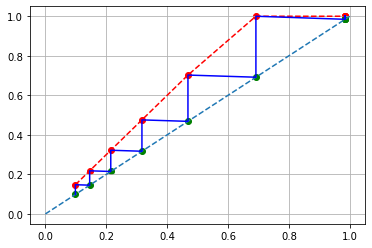

In [79]:
env.render()

/tmp/ipykernel_2116455/1248791063.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  m = -1 / np.tan(alpha_rad)  # Steigung basierend auf dem Winkel
/tmp/ipykernel_2116455/1248791063.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  m = -1 / np.tan(np.radians(alpha))
/tmp/ipykernel_2116455/1248791063.py:62: RuntimeWarning: invalid value encountered in multiply
  y_new_line = m * x_new_line + x_start


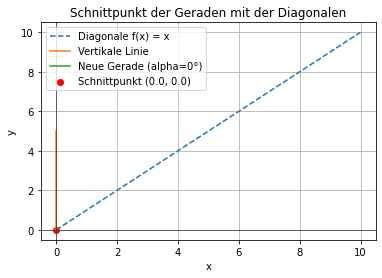

In [37]:
import numpy as np
import matplotlib.pyplot as plt



# Beispielwerte
alpha = 0  # Winkel in Grad
x_start = 5  # Startpunkt y-Koordinate

# Berechnung des Schnittpunkts
intersection = calculate_intersection(alpha, x_start)

    def render(self):
        points = self.points
        angles = self.angles
        intersections = self.intersections
        fig, ax = plt.subplots()

        #diagonal f(x) = x
        x_vals = np.linspace(0, 10, 100)
        y_vals = x_vals
        ax.plot(x_vals, y_vals, label="Diagonale f(x) = x", linestyle="--")
        for i in range(0,len(points)):
            x_start = points[i][0]
            y_start = points[i][1]
            alpha = angles[i]
            intersection = intersections[i]
            # Vertikale Linie (erste Gerade)
            ax.plot([y_start, y_start], [y_start, x_start], label="Vertikale Linie")

            # Neue Gerade
            if alpha == 90:
                if intersection:
                    x_new_line = np.linspace(0, intersection, 100)
                    y_new_line = np.full_like(x_new_line, x_start)
                    ax.plot(x_new_line, y_new_line, label=f"Neue Gerade (alpha={alpha}°)")
            elif intersection:
                m = -1 / np.tan(np.radians(alpha))
                x_new_line = np.linspace(0, intersection, 100)
                y_new_line = m * x_new_line + x_start
                ax.plot(x_new_line, y_new_line, label=f"Neue Gerade (alpha={alpha}°)")

                # Schnittpunkt markieren
                ax.scatter(*intersection, color="red", label=f"Schnittpunkt {intersection}")

        # Labels und Legende
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.axhline(0, color='black',linewidth=0.5)
        ax.axvline(0, color='black',linewidth=0.5)
        ax.legend()
        ax.set_title("Schnittpunkt der Geraden mit der Diagonalen")

        plt.grid()
        plt.show()

